<a href="https://colab.research.google.com/github/GeorgeM2000/Life-Expectancy-Analysis/blob/main/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("readr")
install.packages("writexl")
install.packages("psych")
install.packages("dplyr")
install.packages("car")

In [60]:
install.packages("PMCMRplus")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("gmp"):
“installation of package ‘gmp’ had non-zero exit status”


In [ ]:
library(PMCMRplus)

# Dataset and Data Exploration

In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)
library(readr)
library(writexl)
library(psych)
library(car)

In [3]:
le <- read_excel('Life Expectancy Data.xlsx')

In [ ]:
head(le)

Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,⋯,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [ ]:
# Display the structure of the dataset
str(le)

tibble [2,938 × 22] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:2938] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : num [1:2938] 2015 2014 2013 2012 2011 ...
 $ Status                         : chr [1:2938] "Developing" "Developing" "Developing" "Developing" ...
 $ Life Expectancy                : num [1:2938] 65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult Mortality                : num [1:2938] 263 271 268 272 275 279 281 287 295 295 ...
 $ Infant Deaths                  : num [1:2938] 62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num [1:2938] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage Expenditure         : num [1:2938] 71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis B                    : num [1:2938] 65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : num [1:2938] 1154 492 430 2787 3013 ...
 $ BMI                            : num [1:2

In [ ]:
print(length(unique(le$Alcohol)))
print(length(unique(le$`Percentage Expenditure`)))
print(length(unique(le$`HIV/AIDS`)))
print(length(unique(le$`Thinness  1-19 years`)))
print(length(unique(le$`Thinness 5-9 years`)))
print(length(unique(le$`Income Composition of Resources`)))

[1] 1077
[1] 2328
[1] 200
[1] 201
[1] 208
[1] 626


In [ ]:
# Summary of the dataset
summary(le)

   Country               Year         Status          Life Expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult Mortality Infant Deaths       Alcohol        Percentage Expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

In [7]:
# Display the number of missing values for each feature
print(colSums(is.na(le)))

                        Country                            Year 
                              0                               0 
                         Status                 Life Expectancy 
                              0                              10 
                Adult Mortality                   Infant Deaths 
                             10                               0 
                        Alcohol          Percentage Expenditure 
                            194                               0 
                    Hepatitis B                         Measles 
                            553                               0 
                            BMI               Under-five Deaths 
                             34                               0 
                          Polio               Total Expenditure 
                             19                             226 
                     Diphtheria                        HIV/AIDS 
                         

In [4]:
le$Schooling <- cut(le$Schooling,
                    breaks= c(-Inf, 8, 12, Inf),
                    labels = c(1, 2, 3))

In [5]:
le$Status <- factor(le$Status)
# 1 for Developed and 2 for Developing Countries

In [ ]:
str(le)

tibble [2,938 × 22] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:2938] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                           : num [1:2938] 2015 2014 2013 2012 2011 ...
 $ Status                         : num [1:2938] 1 1 1 1 1 1 1 1 1 1 ...
 $ Life Expectancy                : num [1:2938] 65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult Mortality                : num [1:2938] 263 271 268 272 275 279 281 287 295 295 ...
 $ Infant Deaths                  : num [1:2938] 62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num [1:2938] 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage Expenditure         : num [1:2938] 71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis B                    : num [1:2938] 65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : num [1:2938] 1154 492 430 2787 3013 ...
 $ BMI                            : num [1:2938] 19.1 18.6 18.1 17.6 17.2 16

In [6]:
names(le)[names(le) == "Thinness  1-19 years"] <- "ThinnessAyears"
names(le)[names(le) == "Thinness 5-9 years"] <- "ThinnessByears"

## Categorical Feature Exploration

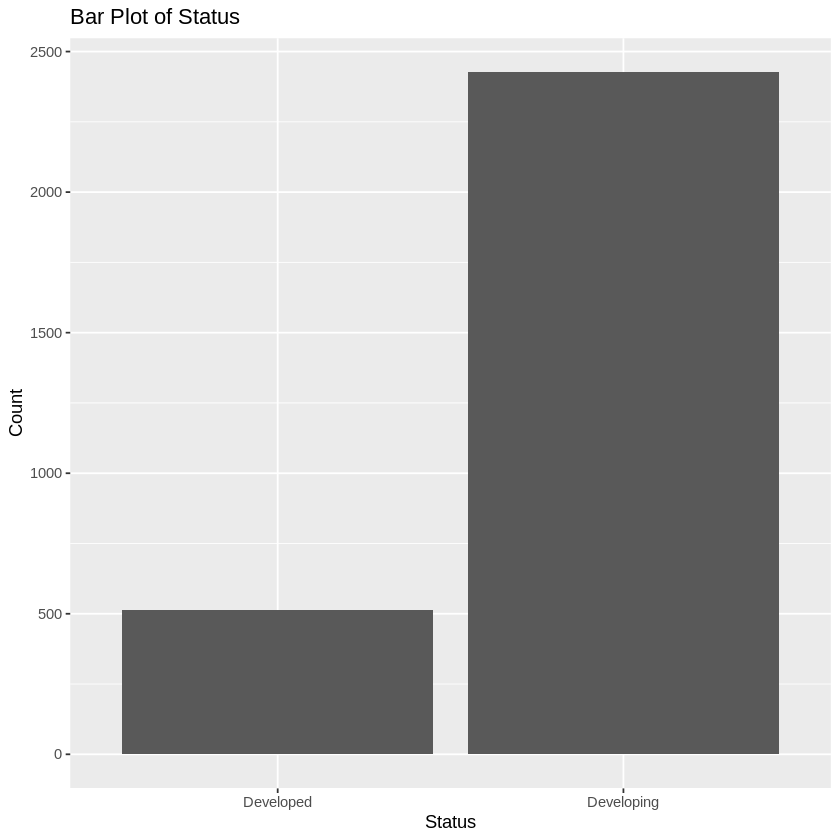

In [ ]:
# Bar plot for Status
ggplot(le, aes(x = Status)) +
  geom_bar() +
  labs(title = "Bar Plot of Status", x = "Status", y = "Count")

In [ ]:
print(table(le$Status))


 Developed Developing 
       512       2426 


In [ ]:
print(prop.table(table(le$Status)))


 Developed Developing 
 0.1742682  0.8257318 


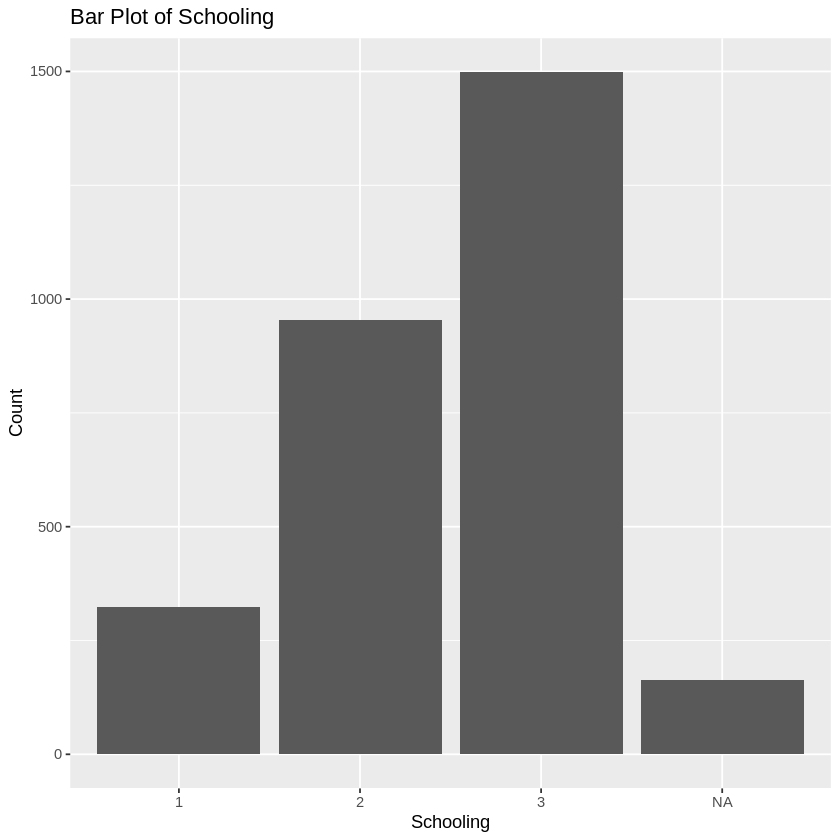

In [ ]:
# Bar plot for Status
ggplot(le, aes(x = Schooling)) +
  geom_bar() +
  labs(title = "Bar Plot of Schooling", x = "Schooling", y = "Count")

In [ ]:
print(table(le$Schooling))


   1    2    3 
 323  954 1498 


In [ ]:
print(prop.table(table(le$Schooling)))


        1         2         3 
0.1163964 0.3437838 0.5398198 


In [ ]:
print(le %>%
  filter(Status %in% c('Developed', 'Developing')) %>%
  group_by(Status, Schooling) %>%
  summarise(count = n()))

`summarise()` has grouped output by 'Status'. You can override using the
`.groups` argument.


# A tibble: 7 × 3
# Groups:   Status [2]
  Status     Schooling count
  <fct>      <fct>     <int>
1 Developed  2             3
2 Developed  3           461
3 Developed  NA           48
4 Developing 1           323
5 Developing 2           951
6 Developing 3          1037
7 Developing NA          115


## Continuous Features Exploration

Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


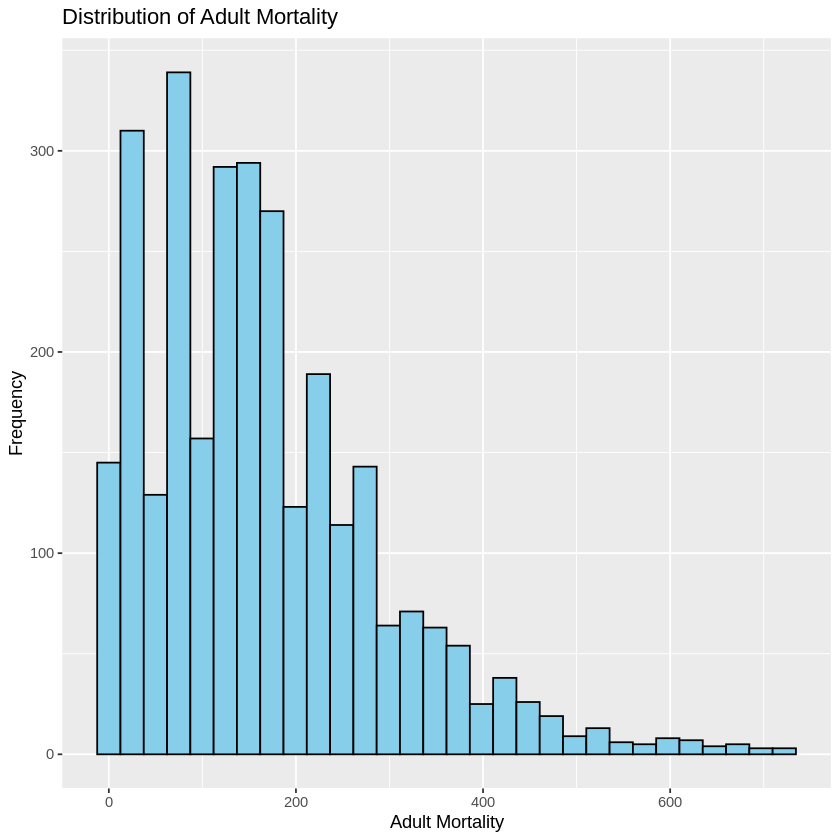

In [17]:
ggplot(le, aes(x = `Adult Mortality`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Adult Mortality", x = "Adult Mortality", y = "Frequency")

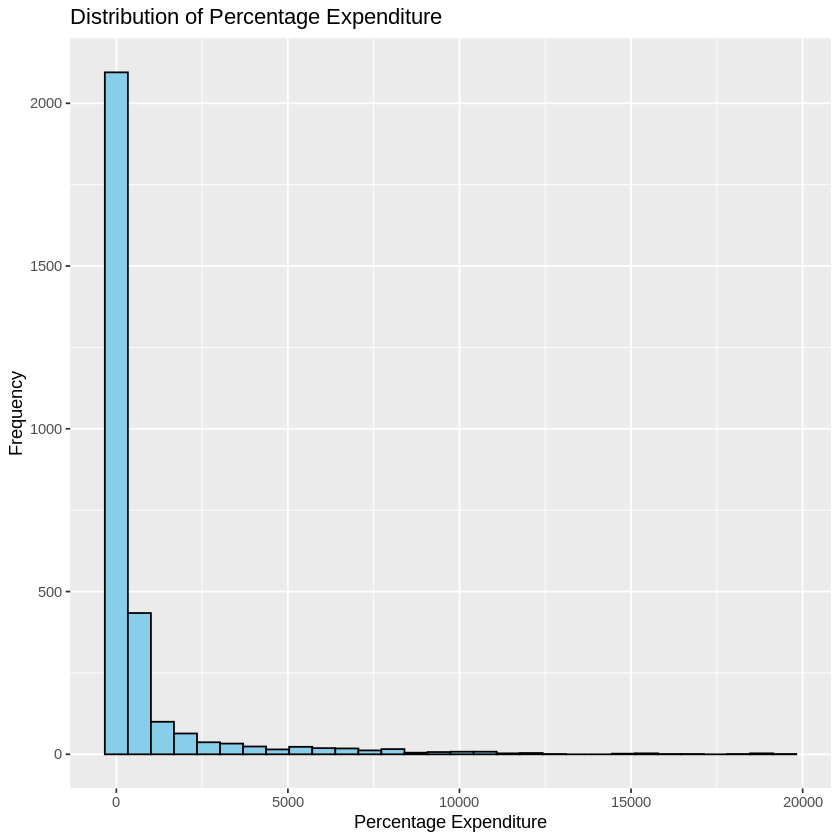

In [ ]:
ggplot(le, aes(x = `Percentage Expenditure`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Percentage Expenditure", x = "Percentage Expenditure", y = "Frequency")

Warning message:
“Removed 34 rows containing non-finite values (`stat_bin()`).”


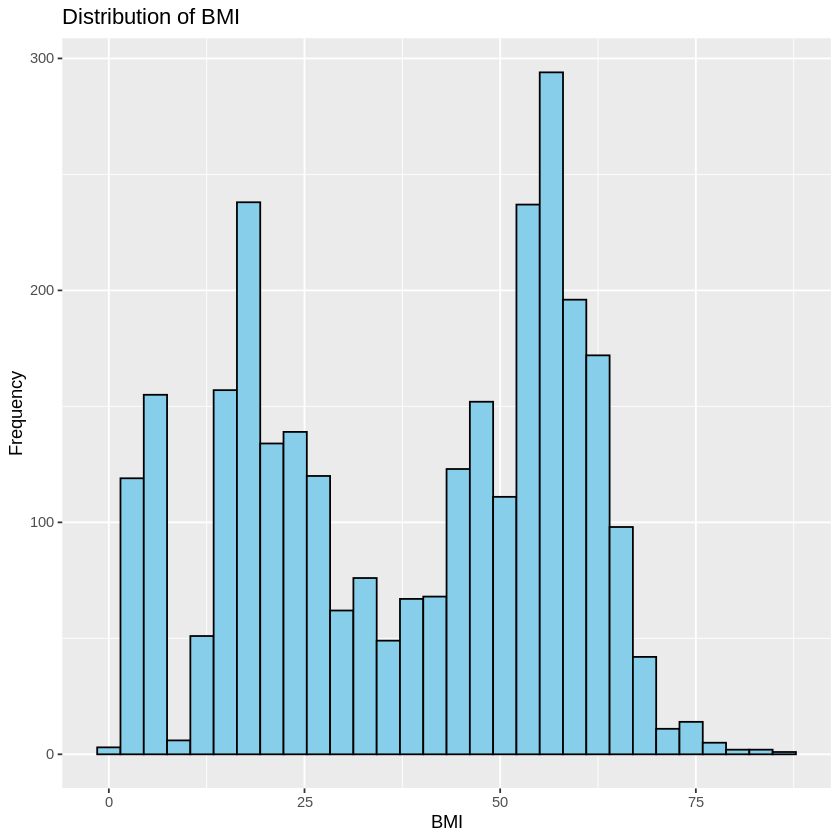

In [ ]:
ggplot(le, aes(x = `BMI`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency")

Warning message:
“Removed 226 rows containing non-finite values (`stat_bin()`).”


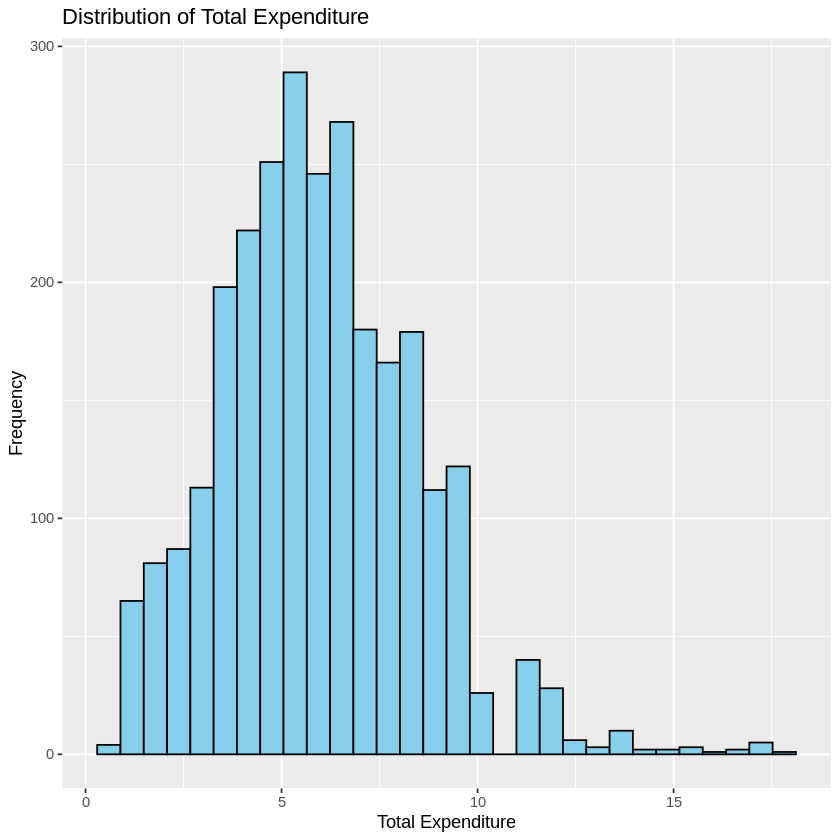

In [ ]:
ggplot(le, aes(x = `Total Expenditure`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Expenditure", x = "Total Expenditure", y = "Frequency")

Warning message:
“Removed 448 rows containing non-finite values (`stat_bin()`).”


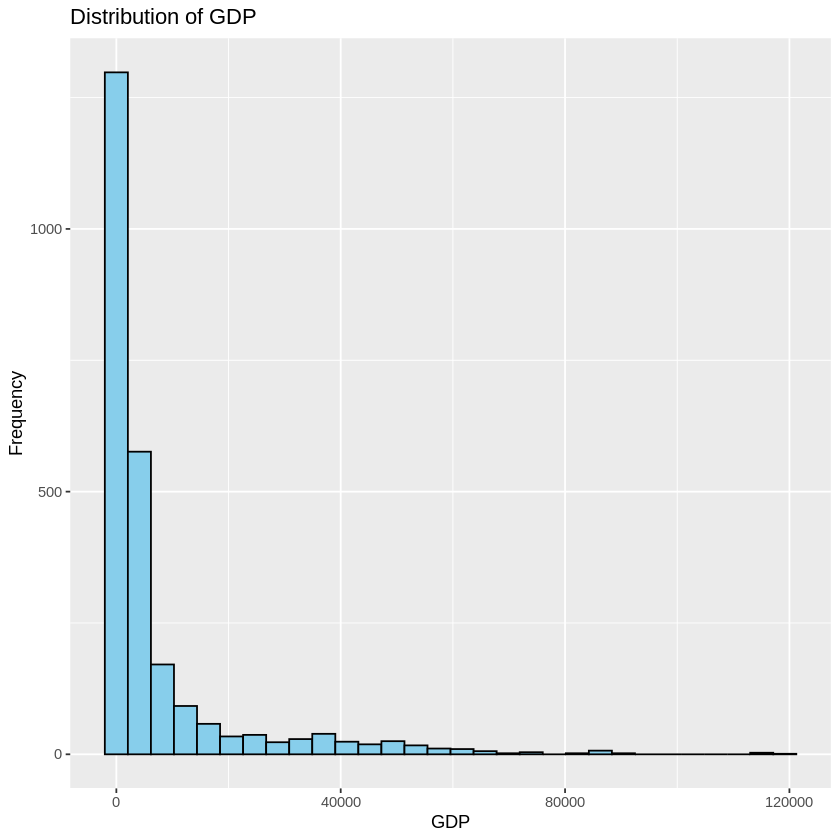

In [ ]:
ggplot(le, aes(x = `GDP`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of GDP", x = "GDP", y = "Frequency")

Warning message:
“Removed 652 rows containing non-finite values (`stat_bin()`).”


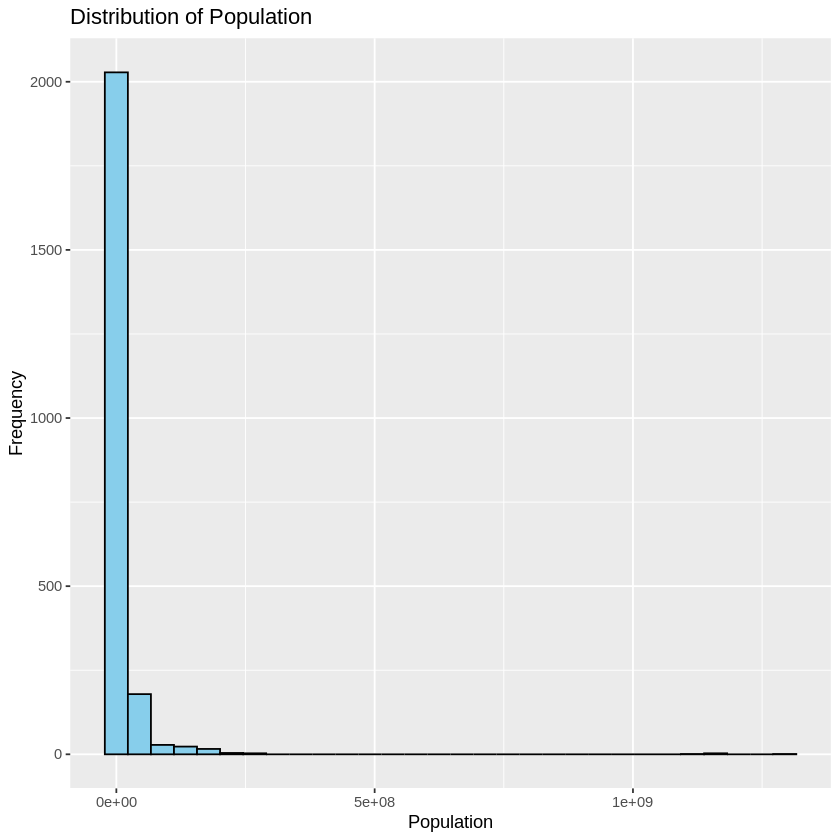

In [ ]:
ggplot(le, aes(x = `Population`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Population", x = "Population", y = "Frequency")

Warning message:
“Removed 167 rows containing non-finite values (`stat_bin()`).”


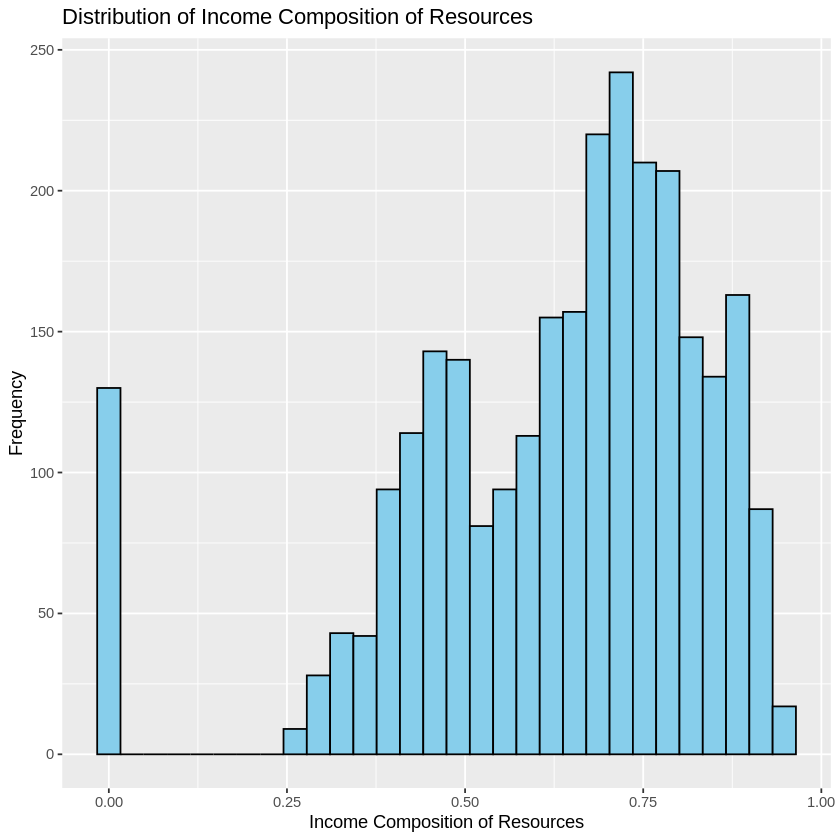

In [ ]:
ggplot(le, aes(x = `Income Composition of Resources`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Income Composition of Resources", x = "Income Composition of Resources", y = "Frequency")

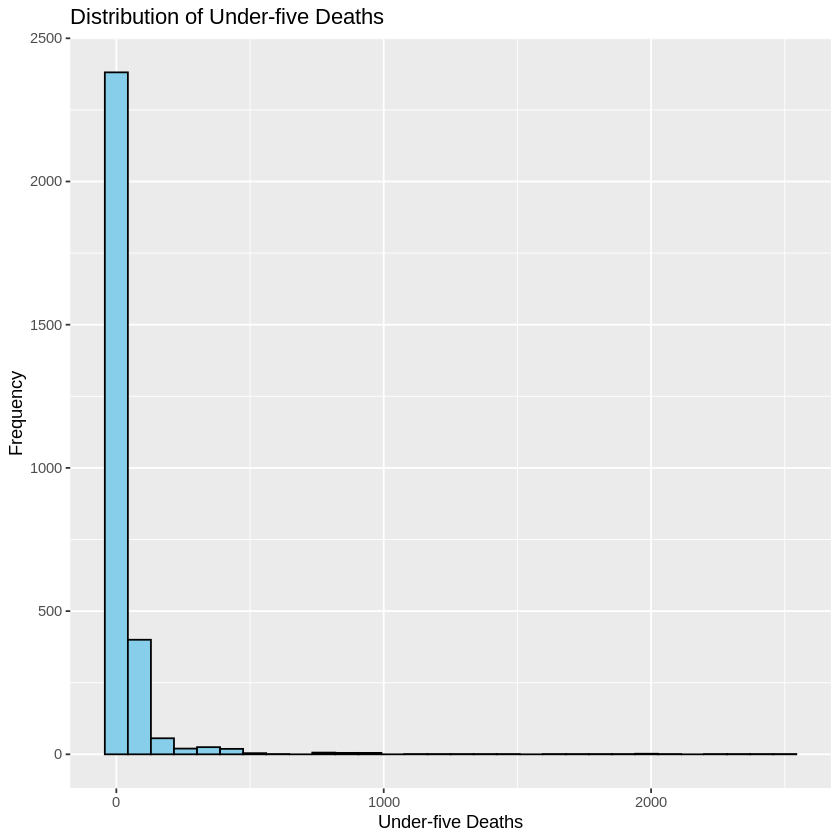

In [ ]:
ggplot(le, aes(x = `Under-five Deaths`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Under-five Deaths", x = "Under-five Deaths", y = "Frequency")

Warning message:
“Removed 194 rows containing non-finite values (`stat_bin()`).”


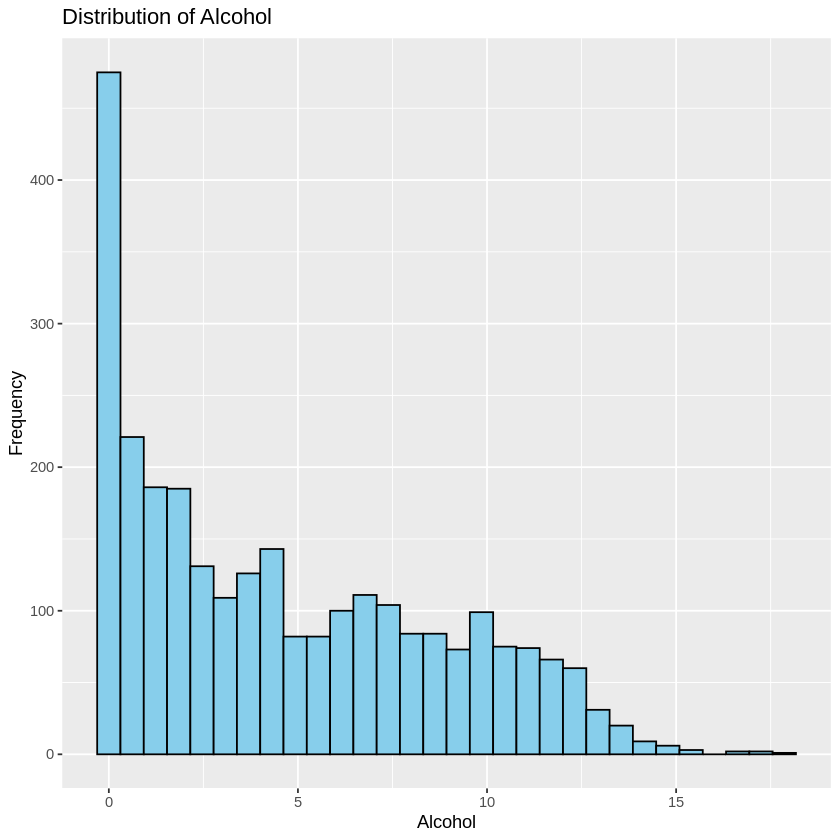

In [ ]:
ggplot(le, aes(x = `Alcohol`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Alcohol", x = "Alcohol", y = "Frequency")

## Statistical Hypothesis Testing

In [18]:
describe(na.omit(le$`Life Expectancy`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,2928,69.22493,9.523867,72.1,69.91493,8.59908,36.3,89,52.7,-0.6379506,-0.2380132,0.1760061


Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


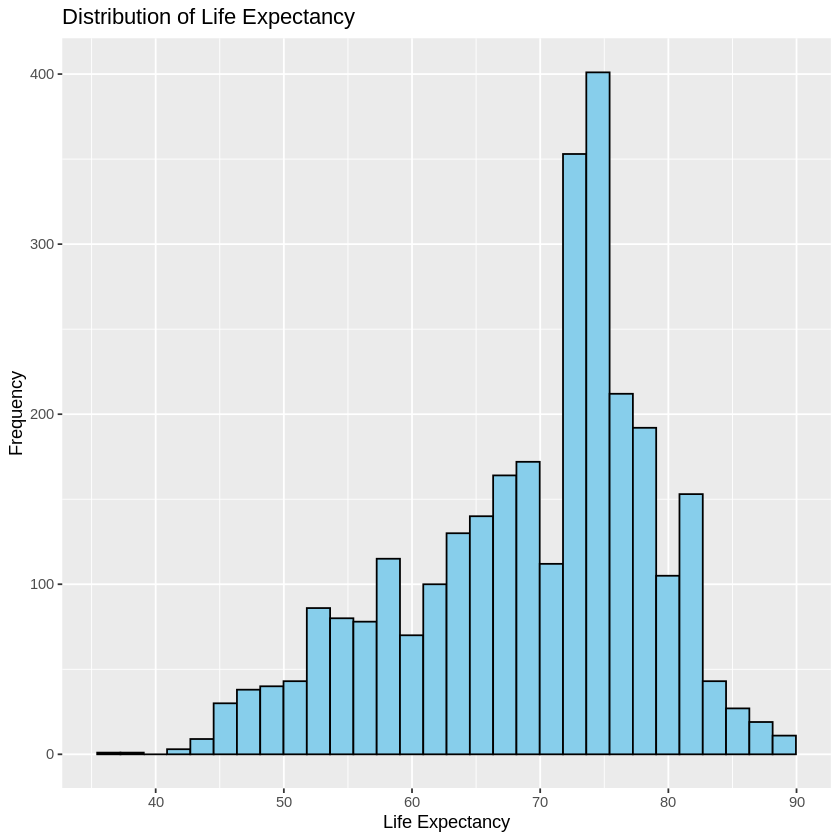

In [ ]:
ggplot(le, aes(x = `Life Expectancy`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Life Expectancy", x = "Life Expectancy", y = "Frequency")

Warning message:
“Removed 10 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_qq()`).”


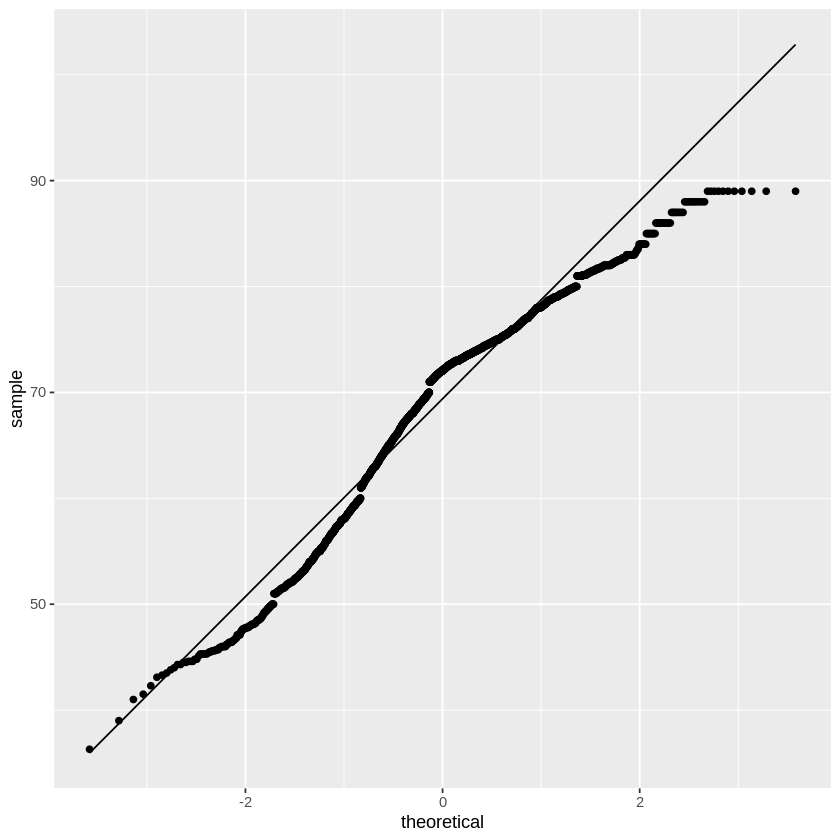

In [ ]:
ggplot(le, aes(sample=`Life Expectancy`)) +
  stat_qq_line() +
  stat_qq()

In [19]:
t.test(na.omit(le$`Life Expectancy`), mu = 70)


	One Sample t-test

data:  na.omit(le$`Life Expectancy`)
t = -4.4036, df = 2927, p-value = 1.103e-05
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 68.87982 69.57004
sample estimates:
mean of x 
 69.22493 


In [22]:
describeBy(le$`Life Expectancy`, le$Status)


 Descriptive statistics by group 
group: Developed
   vars   n mean   sd median trimmed  mad  min max range skew kurtosis   se
X1    1 512 79.2 3.93  79.25   79.15 3.63 69.9  89  19.1 0.09    -0.14 0.17
------------------------------------------------------------ 
group: Developing
   vars    n  mean   sd median trimmed  mad  min max range  skew kurtosis   se
X1    1 2416 67.11 9.01     69   67.81 8.45 36.3  89  52.7 -0.62    -0.37 0.18

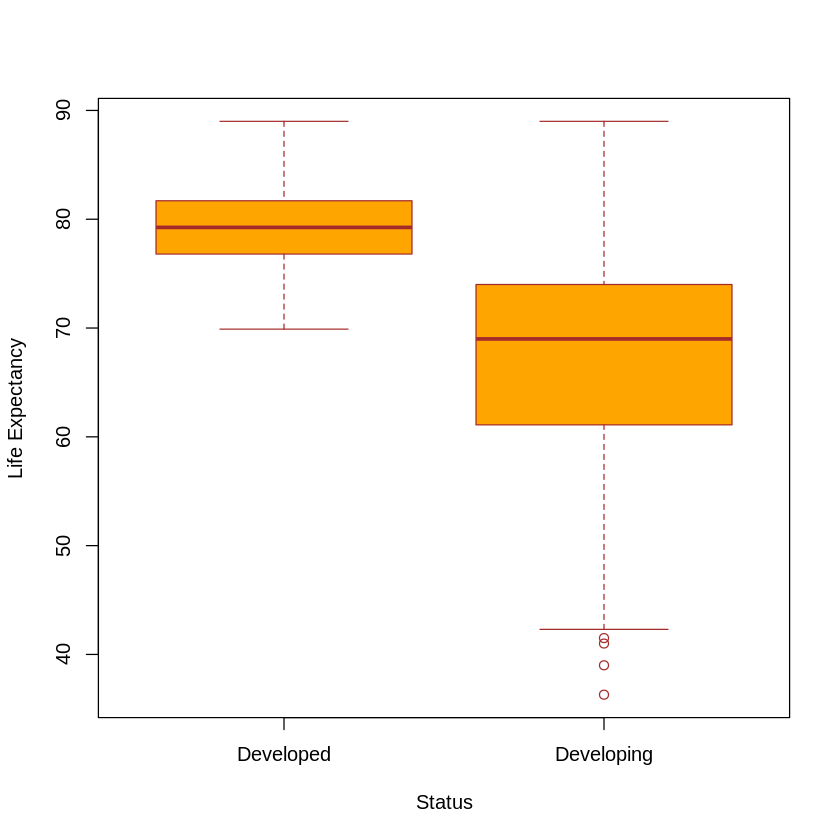

In [23]:
boxplot(`Life Expectancy`~Status,
data=le,
main="",
xlab="Status",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [24]:
leveneTest(`Life Expectancy` ~ Status,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,373.8147,1.776847e-78
,2926,NA,NA


In [25]:
t.test(`Life Expectancy` ~ Status,
        data=le,
        var.equal=F)


	Welch Two Sample t-test

data:  Life Expectancy by Status
t = 47.868, df = 1807, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Developed and group Developing is not equal to 0
95 percent confidence interval:
 11.59118 12.58159
sample estimates:
 mean in group Developed mean in group Developing 
                79.19785                 67.11147 


In [32]:
levels(le$Status)

[1] "Developed"  "Developing"

In [33]:
describeBy(le$`Life Expectancy`, le$Schooling)


 Descriptive statistics by group 
group: 1
   vars   n  mean  sd median trimmed  mad min  max range skew kurtosis   se
X1    1 321 57.29 6.7   57.4   57.22 6.97  39 74.6  35.6 0.13    -0.03 0.37
------------------------------------------------------------ 
group: 2
   vars   n  mean   sd median trimmed  mad  min max range  skew kurtosis   se
X1    1 953 64.13 8.04   65.5   64.73 9.04 36.3  79  42.7 -0.58    -0.32 0.26
------------------------------------------------------------ 
group: 3
   vars    n  mean   sd median trimmed mad  min max range  skew kurtosis   se
X1    1 1494 75.27 5.28   74.9   75.44 4.3 53.7  89  35.3 -0.47     1.59 0.14

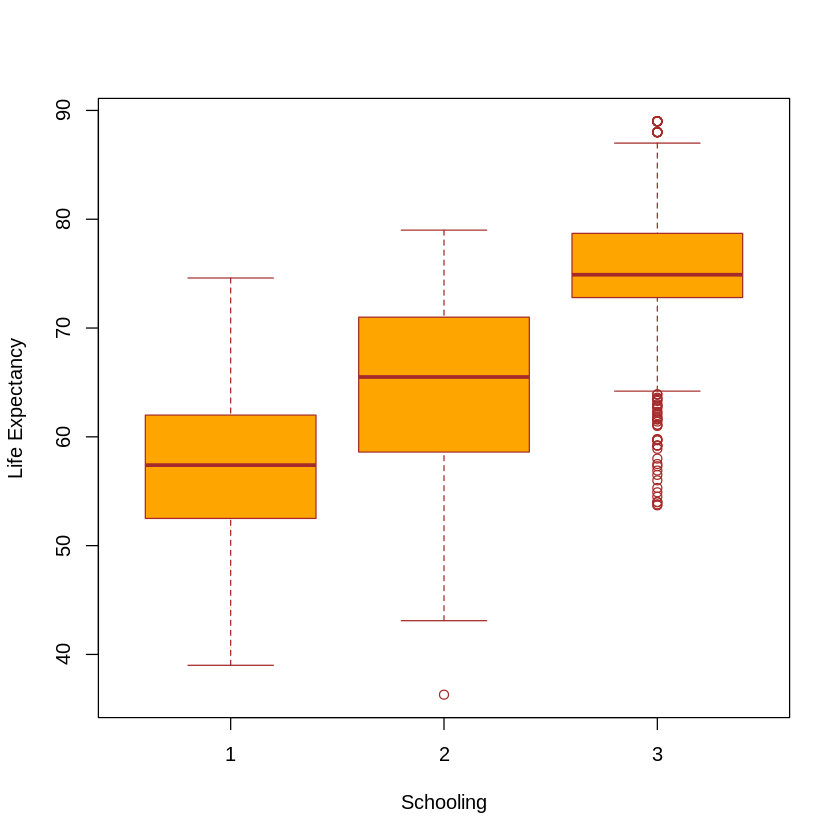

In [34]:
boxplot(`Life Expectancy`~Schooling,
data=le,
main="",
xlab="Schooling",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [35]:
ANOVA.results <- aov(`Life Expectancy` ~ Schooling, data=le)
summary(ANOVA.results)

              Df Sum Sq Mean Sq F value Pr(>F)    
Schooling      2 124977   62488    1471 <2e-16 ***
Residuals   2765 117479      42                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
170 observations deleted due to missingness

In [36]:
leveneTest(`Life Expectancy` ~ Schooling,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,126.8449,1.969996e-53
,2765,NA,NA


In [41]:
dunnett(ANOVA.results)


	 General Linear Hypotheses

Linear Hypotheses:
                 Estimate
(Intercept) == 0   57.287
Schooling2 == 0     6.847
Schooling3 == 0    17.982
